### Samples of fetching Product View with Mark2Market

This first section loads a token from a local .env file 

In [19]:
# Import relevant libraries
import sys,os
from os.path import join, dirname
from dotenv import load_dotenv

sys.path.insert(1, os.path.join(sys.path[0], '..'))  # Hack to include parent directory in search path

# Loading token, url etc from .env file in current directory
load_dotenv('.env')
token = os.environ.get("ENERGYDESK_TOKEN")
server_url = os.environ.get("ENERGYDESK_URL")
print("Using server ", server_url)

Using server  http://127.0.0.1:8001


### Initialize the Python SDK which wraps sme useful REST calls ###

In [20]:
from energydeskapi.sdk.common_utils import init_api
from energydeskapi.customers.customers_api import CustomersApi
from energydeskapi.customers.users_api import UsersApi
from energydeskapi.portfolios.portfoliotree_api import PortfolioTreeApi, PortfoliosApi
from energydeskapi.types.company_enum_types import CompanyTypeEnum, CompanyRoleEnum
import pandas as pd
import json
api_connection=init_api()
jsdata=PortfoliosApi.get_portfolios_embedded(api_connection)
df=pd.DataFrame(data=jsdata)
print(df[['pk', 'description']])


Not setting token   Token
Token setting token  866acd8205e5ddce9c9e8738cf18dfa029a813d0 Token
    pk            description
0    1               Trader 1
1    2               Trader 2
2    3               Trader 3
3    4     Industrikontrakter
4    5               Fastpris
5    6              GoO Total
6    7   HEV Hedging Exchange
7    8  HEV Hedging Bilateral
8    9            HEV Hedging
9   10            HEV Trading
10  11              HEV Total


## Calculate Portfolio ##

In [22]:
from energydeskapi.sdk.common_utils import init_api
from energydeskapi.assets.assets_api import AssetsApi
from energydeskapi.portfolios.portfolioviews_api import PortfolioViewsApi
from energydeskapi.types.company_enum_types import CompanyTypeEnum, CompanyRoleEnum
import pandas as pd
import matplotlib.mlab as mlab
import numpy as np
import matplotlib
import scipy
from IPython.display import display_html
from itertools import chain,cycle
from scipy.stats import norm
from matplotlib import pyplot as plt
from energydeskapi.risk.risk_api import RiskApi

guid, viewdata=PortfolioViewsApi.get_product_view(api_connection, {'portfolio':7})
lst=[]
for row in json.loads(viewdata):
    lst.append({'ticker':row['ticker'],'From':row['delivery_from'],'To':row['delivery_until'],
                'buypos':row['buypos'],
                'sellpos':row['sellpos'],
                'MW':row['netpos'],'MWh':row['netvol']})
df=pd.DataFrame(data=lst)
display_html(df.to_html(),raw=True)

,ticker,From,To,buypos,sellpos,MW,MWh
0,ENOAFUTBLM05-23,2023-04-30T22:00:00.000Z,2023-05-30T22:00:00.000Z,0.00,-52.00,-52.00,-336960.00
1,ENOAFUTBLM06-23,2023-05-31T22:00:00.000Z,2023-06-29T22:00:00.000Z,1.00,-15.00,-14.00,-38976.00
2,ENOAFUTBLM09-23,2023-08-31T22:00:00.000Z,2023-09-29T22:00:00.000Z,15.00,0.00,15.00,31320.00
3,ENOAFUTBLMAPR-23,2023-03-31T22:00:00.000Z,2023-04-30T22:00:00.000Z,394.42,-320.76,73.66,106070.40
4,ENOAFUTBLMFEB-23,2023-01-31T23:00:00.000Z,2023-02-28T23:00:00.000Z,514.84,-514.52,0.32,215.04
5,ENOAFUTBLMJAN-23,2022-12-31T23:00:00.000Z,2023-01-31T23:00:00.000Z,514.84,-514.52,0.32,238.08
6,ENOAFUTBLMJUN-23,2023-05-31T22:00:00.000Z,2023-06-30T22:00:00.000Z,394.42,-320.76,73.66,106070.40
7,ENOAFUTBLMMAR-23,2023-02-28T23:00:00.000Z,2023-03-31T22:00:00.000Z,514.84,-514.52,0.32,237.76
8,ENOAFUTBLMMAY-23,2023-04-30T22:00:00.000Z,2023-05-31T22:00:00.000Z,394.42,-320.76,73.66,109606.08
9,ENOFUTBLQ1-24,2023-12-31T23:00:00.000Z,2024-03-30T23:00:00.000Z,78.00,-436.00,-358.00,-71915040.00


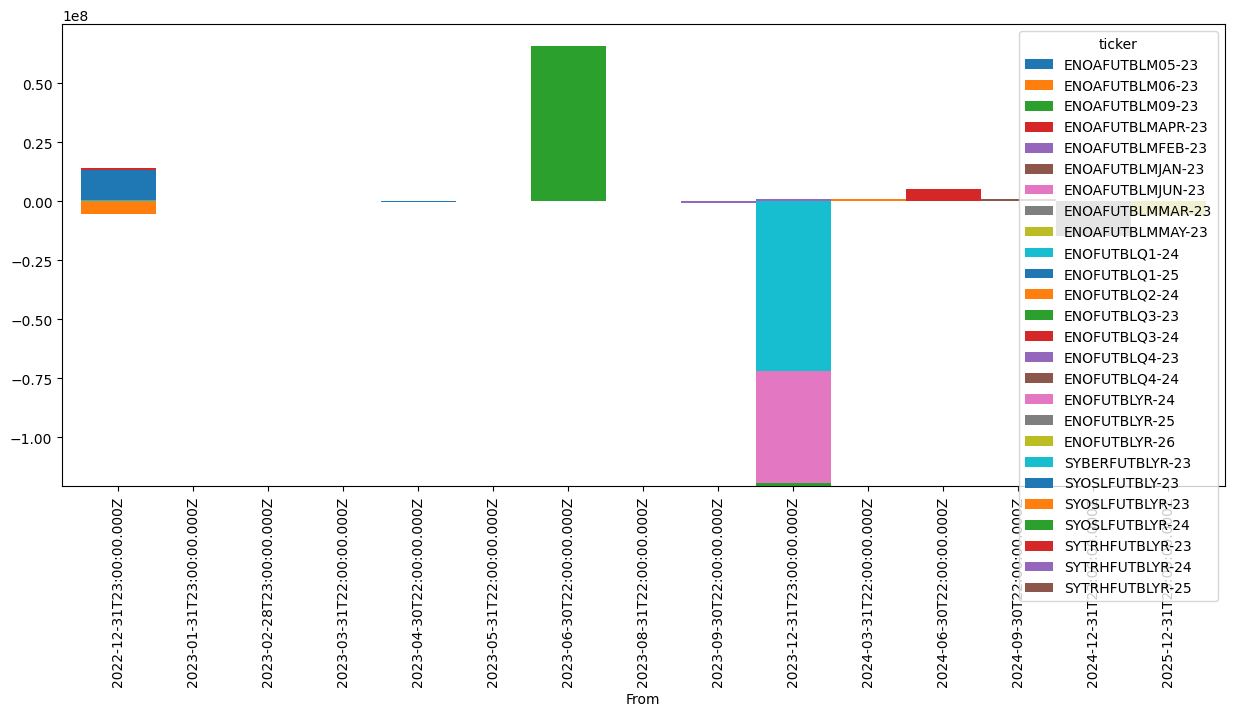

In [39]:
fig,ax = plt.subplots(figsize=(15,6))
df2=df.pivot(index='From', columns='ticker')['MWh']
df2.plot(kind='bar',width=1.0, ax=ax,stacked=True)
plt.show()